In [45]:
import os
import pandas as pd

df_list = []
for filename in os.listdir("/home/frankwoods/Desktop/lassie/data/ws23_raw_data"):
    # creates dataframe holding entire csv
    df = pd.read_csv(f"/home/frankwoods/Desktop/lassie/data/ws23_raw_data/{filename}")
    # takes just the two important columns
    df = df[['toeforce_y', 'toe_position_y']]
    df.columns = ["resistance", "depth"] # rename columns
    df_list.append(df)
print(f"example: {df_list[0]}")


example:        resistance     depth
0       -0.683593 -0.188659
1       -0.683593 -0.188659
2       -0.683593 -0.188659
3       -0.683593 -0.188659
4       -0.683593 -0.188659
...           ...       ...
11599   -1.929471 -0.158198
11600   -1.929471 -0.158198
11601   -1.929471 -0.158198
11602   -1.929471 -0.158198
11603   -1.929471 -0.158198

[11604 rows x 2 columns]


# Initial Data Visualization and Summary

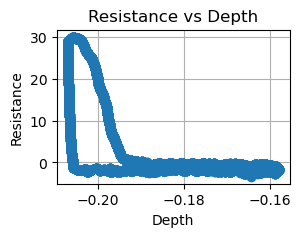

In [46]:

import seaborn as sns
import matplotlib.pyplot as plt

# ---- plot an example graph ----
# Assume you have a DataFrame df with columns 'depth' and 'resistance'
def visualize_data(df_list, graph=False, save_all_graphs=False, save_all_graphs_location="", box_plots=False, histograms=False, graph_i=0):
    if graph:
        plt.figure(figsize=(3,2))         # Optional: set figure size
        plt.plot(df_list[graph_i]['depth'], df_list[graph_i]['resistance'], marker='o', linestyle='-')
        plt.xlabel('Depth')
        plt.ylabel('Resistance')
        plt.title('Resistance vs Depth')
        plt.grid(True)                    
        plt.show()
    
    if save_all_graphs and len(save_all_graphs_location) > 0:
        for i, df in enumerate(df_list):
            plt.figure(figsize=(8,6))         # Optional: set figure size
            plt.plot(df['depth'], df['resistance'], marker='o', linestyle='-')
            plt.xlabel('Depth (m)')
            plt.ylabel('Resistance (N)')
            plt.title('Resistance vs Depth')
            plt.grid(True)
            plt.savefig(f"{save_all_graphs_location}{i}")
            plt.close()

    df_combined_row_wise = pd.concat(df_list, axis=0)
    if box_plots:
        plt.figure(figsize=(3,2))         # Optional: set figure size
        # ---- resistance ----
        sns.boxplot(x=df_combined_row_wise['resistance'])
        plt.show()
        resistance_series = df_combined_row_wise['resistance']
        # ---- depth ----
        plt.figure(figsize=(3,2))         # Optional: set figure size
        sns.boxplot(x=df_combined_row_wise['depth'])
        plt.show()
    if histograms:
        plt.hist(df_combined_row_wise["resistance"], bins=30, density=True)
        plt.title("Resistance Histogram")
        plt.show()

        plt.hist(df_combined_row_wise["depth"], bins=30, density=True)
        plt.title("Depth Histogram")
        plt.show()


visualize_data(df_list, graph=True, save_all_graphs=True, save_all_graphs_location="/home/frankwoods/Desktop/lassie/data/ws23_raw_data_visual/depth_res_")

# Flip curve over y-axis

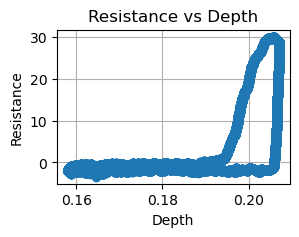

In [47]:
def flip_over_y_axis(df_list):
    cleaned_df_list = []
    for df in df_list:
        copy_df = df.copy()
        copy_df['depth'] = -copy_df['depth']
        cleaned_df_list.append(copy_df)
    return cleaned_df_list

df_list = flip_over_y_axis(df_list)
visualize_data(df_list, graph=True)

# Remove all data points after the max depth

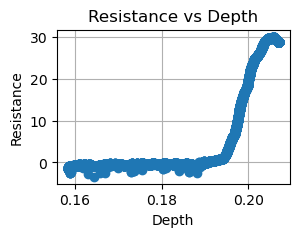

In [48]:
def remove_points_after_max_depth(df_list):
    cleaned_list = []
    for i, df in enumerate(df_list):
        end_idx = df[df["depth"] == df["depth"].max()].index[0]
        cleaned_df = df.iloc[:end_idx+1]
        cleaned_list.append(cleaned_df)
    return cleaned_list

df_list = remove_points_after_max_depth(df_list)
visualize_data(df_list, graph=True)

# Start each graphs depth when arm first contact the ground

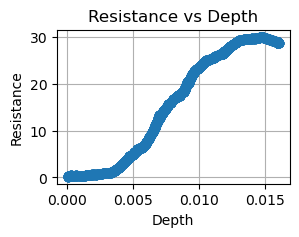

In [49]:
depth_cutoff = [
    0.191, 0.187, 0.191, 0.177, 0.205, 0.181, 0.186, 0.204, 0.191, 0.187,
    0.173, 0.186, 0.166, 0.18, 0.145, 0.18, 0.2, 0.196, 0.198, 0.192,
    0.186, 0.189, 0.192, 0.176, 0.184, 0.196, 0.211, 0.186, 0.185, 0.215,
    0.192, 0.167, 0.165, 0.21, 0.178, 0.166, 0.195, 0.213, 0.185, 0.169,
    0.172, 0.161, 0.194, 0.18, 0.186, 0.144, 0.207, 0.181, 0.197, 0.20,
    0.203, 0.157, 0.189, 0.192, 0.172, 0.176, 0.19, 0.183, 0.187, 0.19,
    0.184, 0.18, 0.194, 0.187, 0.182, 0.195, 0, 0.199, 0.165, 0.17,
    0.213, 0.181, 0.189, 0.155, 0.189, 0.197, 0.19, 0.175, 0.179, 0.191,
    0.18
]

def rm_data_prior_to_arm_penetration(df_list, depth_cutoff):
    cleaned_df_list = []
    for i, df in enumerate(df_list):
        copy_df = df.copy()
        copy_df = copy_df[copy_df["depth"] > depth_cutoff[i]]
        copy_df["depth"] = copy_df["depth"] - depth_cutoff[i]
        cleaned_df_list.append(copy_df)
    return cleaned_df_list

df_list = rm_data_prior_to_arm_penetration(df_list, depth_cutoff)
visualize_data(df_list, graph=True)

# Remove bad samples

In [50]:
def remove_bad_samples(df_list, remove_list):
    cleaned_samples_list = []
    for i, df in enumerate(df_list):
        if i not in remove_list:
            cleaned_samples_list.append(df)
    return cleaned_samples_list

remove_list = [66]
df_list = remove_bad_samples(df_list, remove_list)
print(f"df_list length: {len(df_list)}")
print("bad samples removed")

df_list length: 80
bad samples removed


# Save photos of all cleaned curves

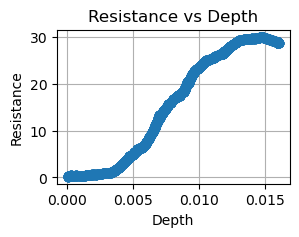

In [51]:
visualize_data(df_list, graph=True, save_all_graphs=True, save_all_graphs_location="/home/frankwoods/Desktop/lassie/data/ws23_processed_data_visual/depth_res_")

# Save the cleaned csv files

In [52]:
def save_data_csv(final_df_list, save: bool):
    if save:
        for i in range(len(final_df_list)):
            final_df_list[i].to_csv(f"/home/frankwoods/Desktop/lassie/data/ws23_processed_data/resistance_depth_{i}.csv")

save_data_csv(df_list, save=True)